## ANL252 TMA
### 14 August 2022
### Question 1(b)

In [1]:
# CHART 1 , SCATTERPLOT
# using pd as an alias for pandas library
import pandas as pd
# using plt as an alias for matplotlib.pyplot
import matplotlib.pyplot as plt

# read and show head of the dataset
df = pd.read_csv("TMA_data.csv")
df.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


In [2]:
# counts of Absence frequency
value_counts = df['Absence'].value_counts()

# converting to df and assigning new names to the columns
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Number of Absence days in previous year', 'Absentees'] # change column names
df_value_counts
df1 = df_value_counts.sort_values(by=['Number of Absence days in previous year'], ascending=True)

print(df1)

    Number of Absence days in previous year  Absentees
13                                        1         11
3                                         2         15
10                                        3         13
0                                         4         20
14                                        5          9
6                                         6         14
4                                         7         15
15                                        8          9
12                                        9         12
17                                       10          8
11                                       11         12
19                                       12          7
7                                        13         14
2                                        14         16
5                                        15         14
1                                        16         19
16                                       17          8
18        

(0.0, 25.0)

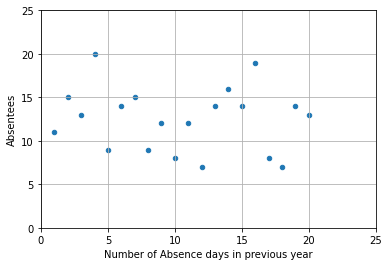

In [3]:
# plot scatterplot
df1.plot.scatter(x = 'Number of Absence days in previous year', y = 'Absentees', )
plt.grid()
plt.xlim(0 , 25)
plt.ylim(0 , 25)

In [4]:
# CHART 2 , GROUP BAR CHART PLOT

dfgbc = pd.read_csv("TMA_data.csv")
dfgbc.head()


,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.0,4,2


In [5]:
# bin the Absence group
dfgbc['Absence group'] = pd.cut(x=dfgbc['Absence'], bins=[0,5,10,15,20], labels=['1-5','6-10','11-15','16-20'])

# tabulation of Absence and PerformanceScore columns
dfgbc2 = pd.crosstab(dfgbc['Absence group'], dfgbc['PerformanceScore'])

# display(dfgbc2)
print(dfgbc2)

PerformanceScore  Exceed  Meet  PIP  To Improve
Absence group                                  
1-5                    8    55    1           4
6-10                   4    51    1           2
11-15                 11    48    0           4
16-20                  7    47    0           7


<AxesSubplot:title={'center':'Performance vs Absence days in previous year'}, xlabel='Absence days in previous year', ylabel='Performance'>

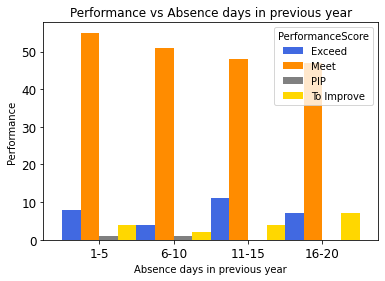

In [6]:
# plot bar chart

colors = ['royalblue','darkorange','grey','gold']
dfgbc2.plot(kind='bar',
        rot=0,
        stacked=False,
        xlabel='Absence days in previous year',
        ylabel='Performance',
        fontsize=12,
        width=1,
        color = colors,
        title='Performance vs Absence days in previous year')


### Question 1(c)

In [7]:
import datetime
import numpy as np
import pandas as pd

# import csv file and see data type

dfdate = pd.read_csv("TMA_data.csv")
dfdate.info() # Row 7 and 8 are not in date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                250 non-null    int64  
 1   Staff             250 non-null    object 
 2   BirthYear         250 non-null    object 
 3   Gender            250 non-null    object 
 4   Marital           250 non-null    object 
 5   Citizenship       250 non-null    object 
 6   Minority          250 non-null    object 
 7   JoinDate          250 non-null    object 
 8   LeftDate          85 non-null     object 
 9   Unit              250 non-null    object 
 10  Salary            250 non-null    int64  
 11  PerformanceScore  250 non-null    object 
 12  Survey            250 non-null    float64
 13  Satisfaction      250 non-null    int64  
 14  Absence           250 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 29.4+ KB


In [8]:
# replace empty LeftDate with 1 May 2022
defaultdate = pd.to_datetime('2022-5-1')
dfdate['LeftDate'] = dfdate['LeftDate'].fillna(defaultdate)

# convert JoinDate and LeftDate column to datetime pandas
dfdate['JoinDate'] = pd.to_datetime(dfdate['JoinDate'])
dfdate['LeftDate'] = pd.to_datetime(dfdate['LeftDate'])

# to check row 7 and 8 successful conversion to datetime
dfdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                250 non-null    int64         
 1   Staff             250 non-null    object        
 2   BirthYear         250 non-null    object        
 3   Gender            250 non-null    object        
 4   Marital           250 non-null    object        
 5   Citizenship       250 non-null    object        
 6   Minority          250 non-null    object        
 7   JoinDate          250 non-null    datetime64[ns]
 8   LeftDate          250 non-null    datetime64[ns]
 9   Unit              250 non-null    object        
 10  Salary            250 non-null    int64         
 11  PerformanceScore  250 non-null    object        
 12  Survey            250 non-null    float64       
 13  Satisfaction      250 non-null    int64         
 14  Absence           250 non-

In [9]:
# Calculates the difference between two dates

dfdate['diff'] = dfdate['LeftDate'] - dfdate['JoinDate']
dfdate['ServiceLength'] = dfdate['diff'] / np.timedelta64(1, 'D')

dfdate.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,diff,ServiceLength
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,46335,Meet,3.4,5,15,3681 days,3681.0
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,66825,Meet,4.6,3,20,2911 days,2911.0
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.4,4,14,2771 days,2771.0
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,93046,Meet,4.1,4,20,2308 days,2308.0
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.0,4,2,3345 days,3345.0


In [10]:
dfdate['ServiceLength']= dfdate['ServiceLength']/365

minvalue = dfdate['ServiceLength'].min()
maxvalue = dfdate['ServiceLength'].max()
avgvalue = dfdate['ServiceLength'].mean()

minvalue = round(minvalue,1)
maxvalue =round(maxvalue,1)
avgvalue = round(avgvalue,1)

print(minvalue,maxvalue,avgvalue)

dfdate.head()

0.1 16.3 6.8


,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence,diff,ServiceLength
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,2012-04-02,2022-05-01,Manufacturing,46335,Meet,3.4,5,15,3681 days,10.084932
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,2014-05-12,2022-05-01,Manufacturing,66825,Meet,4.6,3,20,2911 days,7.975342
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,2014-09-29,2022-05-01,Manufacturing,60446,Meet,3.4,4,14,2771 days,7.591781
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,2016-01-05,2022-05-01,Admin,93046,Meet,4.1,4,20,2308 days,6.323288
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,2011-07-11,2020-09-06,Manufacturing,50825,Meet,5.0,4,2,3345 days,9.164384


### Question 1(d)

In [11]:
import pandas as pd
# import csv file 
data = pd.read_csv("TMA_data.csv")

# extract Staff column as list
namelist = data['Staff'].tolist()

# Start a loop that will run until the user enters 'quit'.
name = str(input("Please enter staff full name for query:"))
while name != 'quit':
    print("Staff name is: " + name)
        
    if name in namelist:
        print("Staff is/was employed here!")
    else:
        print("Staff does not exist.")
    
    if name != 'quit':
        name = input("Continue to enter staff full name for query, or 'quit' to end: ")     
            
    if name == 'quit':
         print("Goodbye")


            
            



Please enter staff full name for query:
Staff name is: 
Staff does not exist.
Continue to enter staff full name for query, or 'quit' to end: Anish Hoover
Staff name is: Anish Hoover
Staff is/was employed here!
Continue to enter staff full name for query, or 'quit' to end: 
Staff name is: 
Staff does not exist.
Continue to enter staff full name for query, or 'quit' to end: Anish
Staff name is: Anish
Staff does not exist.
Continue to enter staff full name for query, or 'quit' to end: 
Staff name is: 
Staff does not exist.
Continue to enter staff full name for query, or 'quit' to end: quit
Goodbye
